<a href="https://colab.research.google.com/github/baut-jc/DDDS-My-Projects/blob/main/Project3/SQL_1_Chinook_project_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project SQL - Chinook

<img src=https://www.sqlitetutorial.net/wp-content/uploads/2015/11/sqlite-sample-database-color.jpg>

[SQL Query Prezi](https://prezi.com/view/XZMeyP0Obx7JEhHE9HKq/)

## Chinook data set

See the lecture on SQLite3 using the Chinook data set to set up the software, database, and tables, as well as for the links to ancillary information about the data set.


In [1]:
# Install the sqlite package for Ubuntu

import sqlite3 as db
import pandas as pd

In [2]:
%%capture
%%bash
apt-get update
apt-get install -y sqlite3

In [3]:
!sqlite3 --help


Usage: sqlite3 [OPTIONS] FILENAME [SQL]
FILENAME is the name of an SQLite database. A new database is created
if the file does not previously exist.
OPTIONS include:
   -A ARGS...           run ".archive ARGS" and exit
   -append              append the database to the end of the file
   -ascii               set output mode to 'ascii'
   -bail                stop after hitting an error
   -batch               force batch I/O
   -box                 set output mode to 'box'
   -column              set output mode to 'column'
   -cmd COMMAND         run "COMMAND" before reading stdin
   -csv                 set output mode to 'csv'
   -deserialize         open the database using sqlite3_deserialize()
   -echo                print commands before execution
   -init FILENAME       read/process named file
   -[no]header          turn headers on or off
   -help                show this message
   -html                set output mode to HTML
   -interactive         force interactive I/O
   -j

In [4]:
%%bash
[ -f chinook.zip ] ||
  curl -s -O https://www.sqlitetutorial.net/wp-content/uploads/2018/03/chinook.zip
unzip -l chinook.zip

Archive:  chinook.zip
  Length      Date    Time    Name
---------  ---------- -----   ----
   884736  2015-11-29 10:53   chinook.db
---------                     -------
   884736                     1 file


In [5]:
!rm -f chinook.db

In [6]:
!unzip -u chinook.zip

Archive:  chinook.zip
  inflating: chinook.db              


In [7]:
!ls -la

total 1180
drwxr-xr-x 1 root root   4096 Jul  1 17:09 .
drwxr-xr-x 1 root root   4096 Jul  1 17:07 ..
-rw-r--r-- 1 root root 884736 Nov 29  2015 chinook.db
-rw-r--r-- 1 root root 305596 Jul  1 17:09 chinook.zip
drwxr-xr-x 4 root root   4096 Jun 26 13:34 .config
drwxr-xr-x 1 root root   4096 Jun 26 13:35 sample_data


In [8]:
# Download the Chinook sqlite database

db_con = db.connect("chinook.db")

!sqlite3 --version

## Come up with questions about your data
Have a look at the Entity-Relation ( ER ) diagram to help come up with questions.

* What sort of information is in this dataset?
* How many records are there?
* How many different countries (states, counties, cities, etc) have records in this data set?


If you are stuck, here are some ideas for questions:
- https://github.com/LucasMcL/15-sql_queries_02-chinook/blob/master/README.md
- [Using the R language]( https://rpubs.com/enext777/636199 )
- [Search Google]( https://www.google.com/search?q=chinook+database+questions )



## Use SQL queries to pull specific information

Do NOT pull all the data and then filter using DataFrame methods etc. Make sure and use AT LEAST 13 of the 15 SQL options listed below. (You may have to get creative and come up with more questions to ask/answer.)


### Basic Queries


In [9]:
%%script sqlite3 --column --header chinook.db
.tables

#11 dataset

albums          employees       invoices        playlists     
artists         genres          media_types     tracks        
customers       invoice_items   playlist_track


In [10]:
%%script sqlite3 --column --header chinook.db
.schema

CREATE TABLE IF NOT EXISTS "albums"
(
    [AlbumId] INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
    [Title] NVARCHAR(160)  NOT NULL,
    [ArtistId] INTEGER  NOT NULL,
    FOREIGN KEY ([ArtistId]) REFERENCES "artists" ([ArtistId]) 
		ON DELETE NO ACTION ON UPDATE NO ACTION
);
CREATE TABLE sqlite_sequence(name,seq);
CREATE TABLE IF NOT EXISTS "artists"
(
    [ArtistId] INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
    [Name] NVARCHAR(120)
);
CREATE TABLE IF NOT EXISTS "customers"
(
    [CustomerId] INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
    [FirstName] NVARCHAR(40)  NOT NULL,
    [LastName] NVARCHAR(20)  NOT NULL,
    [Company] NVARCHAR(80),
    [Address] NVARCHAR(70),
    [City] NVARCHAR(40),
    [State] NVARCHAR(40),
    [Country] NVARCHAR(40),
    [PostalCode] NVARCHAR(10),
    [Phone] NVARCHAR(24),
    [Fax] NVARCHAR(24),
    [Email] NVARCHAR(60)  NOT NULL,
    [SupportRepId] INTEGER,
    FOREIGN KEY ([SupportRepId]) REFERENCES "employees" ([EmployeeId]) 
		ON DELETE NO ACTION ON 

#### SELECT (with * and with column names)


In [11]:
# -- count values in each table
%%script sqlite3 --column --header chinook.db

-- SELECT name FROM db_con WHERE type='table'

SELECT 'customers' AS table_name, COUNT(*) AS record_count FROM customers
UNION
SELECT 'invoices', COUNT(*) FROM invoices
UNION
SELECT 'invoice_items', COUNT(*) FROM invoice_items
UNION
SELECT 'tracks', COUNT(*) FROM tracks
UNION
SELECT 'albums', COUNT(*) FROM albums
UNION
SELECT 'artists', COUNT(*) FROM artists
UNION
SELECT 'genres', COUNT(*) FROM genres
UNION
SELECT 'employees', COUNT(*) FROM employees
UNION
SELECT 'media_types', COUNT(*) FROM media_types;

table_name     record_count
-------------  ------------
albums         347         
artists        275         
customers      59          
employees      8           
genres         25          
invoice_items  2240        
invoices       412         
media_types    5           
tracks         3503        


#### WHERE


In [12]:
# Select all customers from the USA
%%script sqlite3 --column --header chinook.db

SELECT
  FirstName,
  LastName,
  Country
FROM
  customers
WHERE
  Country = 'USA';


FirstName  LastName    Country
---------  ----------  -------
Frank      Harris      USA    
Jack       Smith       USA    
Michelle   Brooks      USA    
Tim        Goyer       USA    
Dan        Miller      USA    
Kathy      Chase       USA    
Heather    Leacock     USA    
John       Gordon      USA    
Frank      Ralston     USA    
Victor     Stevens     USA    
Richard    Cunningham  USA    
Patrick    Gray        USA    
Julia      Barnett     USA    


#### AND


In [13]:
# Customers from the USA who represents a company
%%script sqlite3 --column --header chinook.db

SELECT
  FirstName,
  LastName,
  Country,
  Company
FROM
  customers
WHERE
  Country = 'USA'
AND
  Company IS NOT NULL;

FirstName  LastName  Country  Company              
---------  --------  -------  ---------------------
Frank      Harris    USA      Google Inc.          
Jack       Smith     USA      Microsoft Corporation
Tim        Goyer     USA      Apple Inc.           


#### OR


In [14]:
# Customers from Brazil OR Argentina
%%script sqlite3 --column --header chinook.db

SELECT
  FirstName,
  Country
FROM
  customers
WHERE
  Country = 'Brazil'
  OR
  Country = 'Argentina';

FirstName  Country  
---------  ---------
Luís       Brazil   
Eduardo    Brazil   
Alexandre  Brazil   
Roberto    Brazil   
Fernanda   Brazil   
Diego      Argentina


#### LIKE (with % or _ wildcard)


In [15]:
# Customers whose last name starts with 'B'
%%script sqlite3 --column --header chinook.db

SELECT
  FirstName,
  LastName
FROM
  customers
WHERE
  LastName
  LIKE 'B%';

FirstName  LastName
---------  --------
Michelle   Brooks  
Julia      Barnett 
Robert     Brown   
Camille    Bernard 


#### BETWEEN


In [16]:
# Invoices where total is between 5 and 15
%%script sqlite3 --column --header chinook.db

SELECT
  InvoiceId,
  Total
FROM
  invoices
WHERE
  Total
  BETWEEN 5 AND 15;

InvoiceId  Total
---------  -----
3          5.94 
4          8.91 
5          13.86
10         5.94 
11         8.91 
12         13.86
17         5.94 
18         8.91 
19         13.86
24         5.94 
25         8.91 
26         13.86
31         5.94 
32         8.91 
33         13.86
38         5.94 
39         8.91 
40         13.86
45         5.94 
46         8.91 
47         13.86
52         5.94 
53         8.91 
54         13.86
59         5.94 
60         8.91 
61         13.86
66         5.94 
67         8.91 
68         13.86
73         5.94 
74         8.91 
75         13.86
80         5.94 
81         8.91 
82         13.86
87         6.94 
94         5.94 
95         8.91 
101        5.94 
102        9.91 
108        5.94 
109        8.91 
110        13.86
115        5.94 
116        8.91 
117        13.86
122        5.94 
123        8.91 
124        13.86
129        5.94 
130        8.91 
131        13.86
136        5.94 
137        8.91 
138        13.86
143        5.9

#### LIMIT



In [17]:
# Top 7 customers by total support rep ID
%%script sqlite3 --column --header chinook.db

SELECT
  FirstName,
  LastName,
  SupportRepId
FROM
  customers
ORDER BY
  SupportRepId DESC
LIMIT 7;

FirstName  LastName      SupportRepId
---------  ------------  ------------
Luis       Rojas         5           
Steve      Murray        5           
Joakim     Johansson     5           
Enrique    Muñoz         5           
Johannes   Van der Berg  5           
Lucas      Mancini       5           
Marc       Dubois        5           


### Sorting and Grouping


#### ORDER BY


In [18]:
# List tracks ordered by duration (milliseconds), longest first
%%script sqlite3 --column --header chinook.db

SELECT
  Milliseconds,
  Name
FROM
  tracks
ORDER BY
  Milliseconds DESC;

Milliseconds  Name                                                                                                                       
------------  ---------------------------------------------------------------------------------------------------------------------------
5286953       Occupation / Precipice                                                                                                     
5088838       Through a Looking Glass                                                                                                    
2960293       Greetings from Earth, Pt. 1                                                                                                
2956998       The Man With Nine Lives                                                                                                    
2956081       Battlestar Galactica, Pt. 2                                                                                                
2952702       Battlestar Galactica

#### DISTINCT


In [19]:
# Unique billing cities from invoices
%%script sqlite3 --column --header chinook.db

SELECT
DISTINCT
  BillingCity
FROM
  invoices;

BillingCity        
-------------------
Stuttgart          
Oslo               
Brussels           
Edmonton           
Boston             
Frankfurt          
Berlin             
Paris              
Bordeaux           
Dublin             
London             
Mountain View      
Redmond            
Cupertino          
Reno               
Madison            
Halifax            
Edinburgh          
Sidney             
Santiago           
Bangalore          
São Paulo          
Yellowknife        
Lisbon             
Amsterdam          
Rio de Janeiro     
Brasília           
Vancouver          
Tucson             
Madrid             
Stockholm          
Prague             
Toronto            
Ottawa             
Winnipeg           
Helsinki           
Copenhagen         
Rome               
Warsaw             
Fort Worth         
Salt Lake City     
Vienne             
Dijon              
Budapest           
Orlando            
Chicago            
São José dos Campos
Montréal           


#### GROUP BY

number of costumers by country in descending order.

In [20]:
%%script sqlite3 --column --header chinook.db

SELECT
  Country,
COUNT(*) AS
  CustomerCount
FROM
  customers
GROUP BY Country
ORDER BY CustomerCount DESC;

Country         CustomerCount
--------------  -------------
USA             13           
Canada          8            
France          5            
Brazil          5            
Germany         4            
United Kingdom  3            
Portugal        2            
India           2            
Czech Republic  2            
Sweden          1            
Spain           1            
Poland          1            
Norway          1            
Netherlands     1            
Italy           1            
Ireland         1            
Hungary         1            
Finland         1            
Denmark         1            
Chile           1            
Belgium         1            
Austria         1            
Australia       1            
Argentina       1            


### Aggregates


#### MAX


In [21]:
# Maximum invoice total per billing country
%%script sqlite3 --column --header chinook.db

SELECT
  BillingCountry,
MAX(Total)
AS
  MaxTotal
FROM invoices
GROUP BY BillingCountry;

BillingCountry  MaxTotal
--------------  --------
Argentina       13.86   
Australia       13.86   
Austria         18.86   
Belgium         13.86   
Brazil          13.86   
Canada          13.86   
Chile           17.91   
Czech Republic  25.86   
Denmark         13.86   
Finland         13.86   
France          16.86   
Germany         14.91   
Hungary         21.86   
India           13.86   
Ireland         21.86   
Italy           13.86   
Netherlands     13.86   
Norway          15.86   
Poland          13.86   
Portugal        13.86   
Spain           13.86   
Sweden          13.86   
USA             23.86   
United Kingdom  13.86   


#### MIN


In [22]:
# Minimum invoice total per country
%%script sqlite3 --column --header chinook.db

SELECT
  BillingCountry,
MIN(Total)
AS
  MinInvoice
FROM
  invoices
GROUP BY BillingCountry
ORDER BY MinInvoice ASC;

BillingCountry  MinInvoice
--------------  ----------
Argentina       0.99      
Australia       0.99      
Austria         0.99      
Belgium         0.99      
Brazil          0.99      
Canada          0.99      
Chile           0.99      
Czech Republic  0.99      
Denmark         0.99      
Finland         0.99      
France          0.99      
Germany         0.99      
Hungary         0.99      
Ireland         0.99      
Italy           0.99      
Netherlands     0.99      
Norway          0.99      
Poland          0.99      
Portugal        0.99      
Spain           0.99      
Sweden          0.99      
USA             0.99      
United Kingdom  0.99      
India           1.98      


#### SUM


In [23]:
# Total sales per billing country
%%script sqlite3 --column --header chinook.db

SELECT
  BillingCountry,
SUM(Total)
  AS TotalSales
FROM
  invoices
GROUP BY BillingCountry
ORDER BY TotalSales DESC;

BillingCountry  TotalSales
--------------  ----------
USA             523.06    
Canada          303.96    
France          195.1     
Brazil          190.1     
Germany         156.48    
United Kingdom  112.86    
Czech Republic  90.24     
Portugal        77.24     
India           75.26     
Chile           46.62     
Ireland         45.62     
Hungary         45.62     
Austria         42.62     
Finland         41.62     
Netherlands     40.62     
Norway          39.62     
Sweden          38.62     
Poland          37.62     
Italy           37.62     
Denmark         37.62     
Australia       37.62     
Argentina       37.62     
Spain           37.62     
Belgium         37.62     


#### AVG


In [24]:
# Average invoice total per billing country
%%script sqlite3 --column --header chinook.db

SELECT
  BillingCountry,
AVG(Total)
AS
  AvgInvoice
FROM
  invoices
GROUP BY BillingCountry
ORDER BY AvgInvoice DESC;

BillingCountry  AvgInvoice      
--------------  ----------------
Chile           6.66            
Ireland         6.51714285714286
Hungary         6.51714285714286
Czech Republic  6.44571428571429
Austria         6.08857142857143
Finland         5.94571428571429
Netherlands     5.80285714285714
India           5.78923076923077
USA             5.74791208791209
Norway          5.66            
Germany         5.58857142857143
France          5.57428571428571
Sweden          5.51714285714286
Portugal        5.51714285714286
Brazil          5.43142857142857
Canada          5.42785714285714
Poland          5.37428571428571
Italy           5.37428571428571
Denmark         5.37428571428571
Australia       5.37428571428571
Argentina       5.37428571428571
United Kingdom  5.37428571428571
Spain           5.37428571428571
Belgium         5.37428571428571


#### COUNT



In [25]:
# Count customers by country
%%script sqlite3 --column --header chinook.db

SELECT
  Country,
COUNT(*) AS
  CustomerCount
FROM
  customers
GROUP BY Country
ORDER BY CustomerCount DESC;

Country         CustomerCount
--------------  -------------
USA             13           
Canada          8            
France          5            
Brazil          5            
Germany         4            
United Kingdom  3            
Portugal        2            
India           2            
Czech Republic  2            
Sweden          1            
Spain           1            
Poland          1            
Norway          1            
Netherlands     1            
Italy           1            
Ireland         1            
Hungary         1            
Finland         1            
Denmark         1            
Chile           1            
Belgium         1            
Austria         1            
Australia       1            
Argentina       1            


## Make some plots

Make some cool plots to go with your data. Write SQL queries to get ONLY the information you need for each plot. (Don't pull ALL the data and then just plot a few columns.)



In [26]:
# put into pandas and make into plot to become familiar with plotting

In [27]:
import matplotlib.pyplot as plt

#### Bar Plot

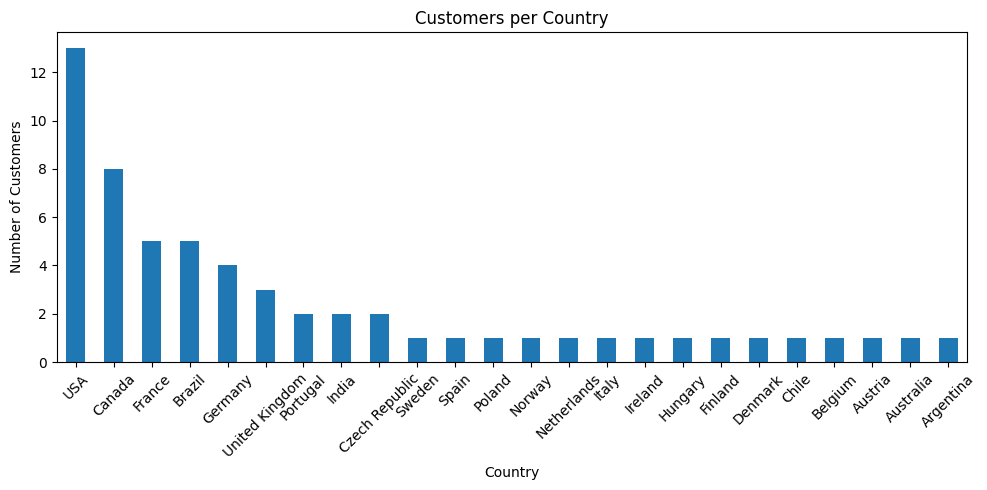

In [28]:
# Customers per Country (Bar Plot)
query = """
SELECT Country, COUNT(*) AS NumCustomers
FROM customers
GROUP BY Country
ORDER BY NumCustomers DESC;
"""
df = pd.read_sql_query(query, db_con)

# Plot
df.plot(kind='bar', x='Country', y='NumCustomers', figsize=(10,5), legend=False)
plt.title('Customers per Country')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Line Plot

/tmp/ipython-input-29-4134842518.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = df.resample('M', on='InvoiceDate').mean(numeric_only=True)


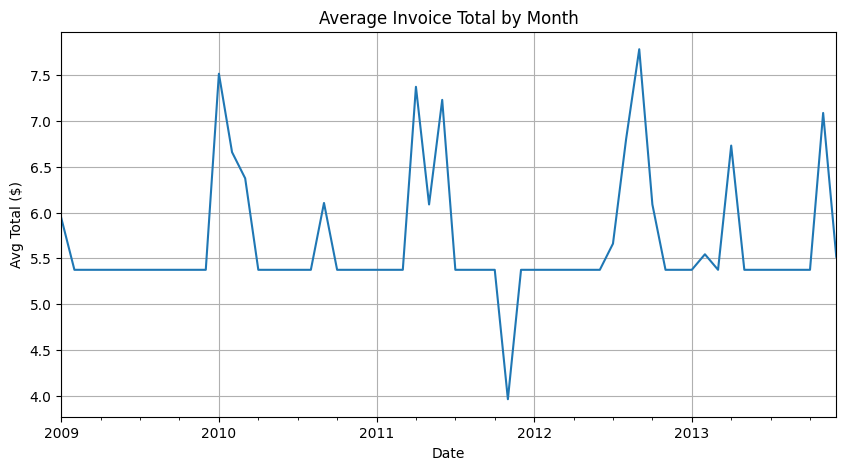

In [29]:
# Avg Invoice Total Over Time
query = "SELECT InvoiceDate, Total FROM invoices;"
df = pd.read_sql_query(query, db_con)
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

monthly_avg = df.resample('M', on='InvoiceDate').mean(numeric_only=True)

monthly_avg.plot(y='Total', figsize=(10,5), legend=False)
plt.title('Average Invoice Total by Month')
plt.ylabel('Avg Total ($)')
plt.xlabel('Date')
plt.grid(True)
plt.show()


#### Scatter Plot

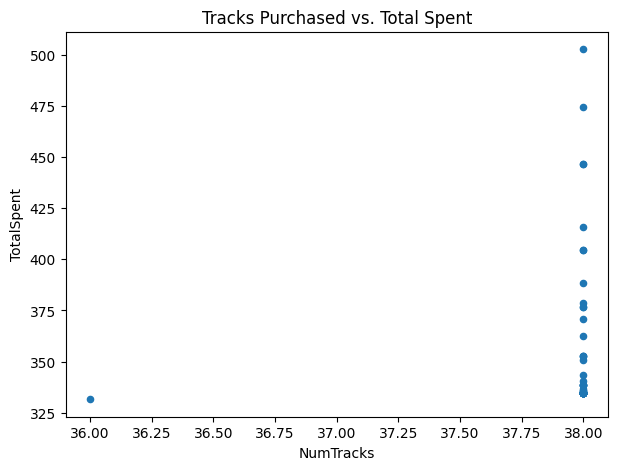

In [30]:
# Track vs. Total Spent
query = """
SELECT c.CustomerId, COUNT(il.TrackId) AS NumTracks, SUM(i.Total) AS TotalSpent
FROM customers c
JOIN invoices i ON c.CustomerId = i.CustomerId
JOIN invoice_items il ON i.InvoiceId = il.InvoiceId
GROUP BY c.CustomerId;
"""
df = pd.read_sql_query(query, db_con)

df.plot(kind='scatter', x='NumTracks', y='TotalSpent', figsize=(7,5))
plt.title('Tracks Purchased vs. Total Spent')
plt.show()


## EXTRA CREDIT:
* Use a CTE
* Use a query that joins two or more tables.
* Make a model to see if you can predict something
* Come up with something else cool to do with your data


#### CTE class demo 07/01

In [33]:
query = """
WITH
  ratio as (
    SELECT
      GenreId,
      count(1) as count,
      count(Composer) as count_not_none
    FROM
      tracks
    GROUP BY
      GenreID
  )

select
  *,
  100-(count_not_none*100/count) as ratio
from
  ratio

;
"""

with db.connect('chinook.db') as db_con:
  tables = pd.read_sql_query( query , db_con )

tables

,GenreId,count,count_not_none,ratio
0,1,1297,1129,13
1,2,130,79,40
2,3,374,330,12
3,4,332,301,10
4,5,12,12,0
5,6,81,81,0
6,7,579,270,54
7,8,58,31,47
8,9,48,22,55
9,10,43,27,38
